**Step 1: Import all the Libraries**



In [ ]:
# Essential Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# SMOTE for class imbalance
from imblearn.over_sampling import SMOTE

**Step 2: Load and Explore Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Check the dataset shape and initial rows
print("Dataset Shape:", df.shape)
print("First 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (284807, 31)
First 5 Rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.2

2.1 Visualization of Class Imbalance.

Fraudulent transactions are rare in this dataset, so let’s visualize the class distribution:



Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


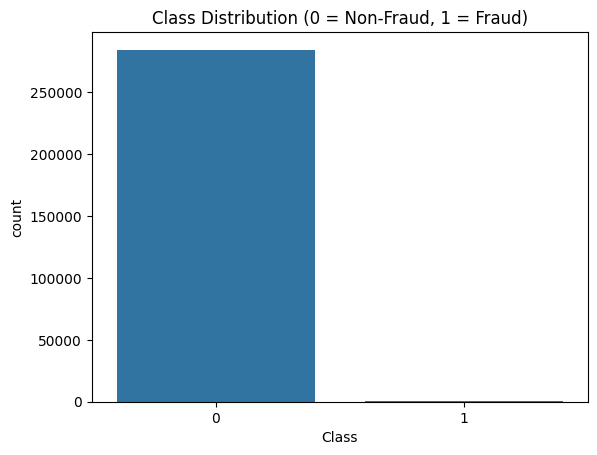

In [ ]:
# Count and visualize class distribution
print("\nClass Distribution:\n", df['Class'].value_counts())

sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

Conclusion:

the dataset is highly imbalanced, with Class 1 (fraudulent transactions) having only 492 instances compared to Class 0 (non-fraudulent transactions) at 284,315 instances.

This imbalance (~0.17% fraud cases) is typical for real-world fraud detection problems and will influence the following decisions:


**Step 3: Preprocessing**




3.1 Scale the Features
Scale the Amount and Time columns since they have different ranges from other features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaled versions of 'Amount' and 'Time'
scaler = StandardScaler()
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Amount' and 'Time' columns
df = df.drop(['Amount', 'Time'], axis=1)
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  Scaled_Amount  Scaled_Time  

3.2 Split the Dataset
We’ll split the dataset into:

Train-and-Validate Set (80% of data) for training and hyperparameter tuning.
Test Set (20% of data) for final evaluation.
From the Train-and-Validate Set, we’ll further split:

Training Set: 75% of Train-and-Validate.
Validation Set: 25% of Train-and-Validate.

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Step 1: Split into Train-and-Validate and Test sets
X_train_validate, X_test, y_train_validate, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Split Train-and-Validate into Training and Validation sets
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train_validate, y_train_validate, test_size=0.25, stratify=y_train_validate, random_state=42
)

# Check the class distribution in each split
def check_class_distribution(y, label):
    print(f"{label} Set Class Distribution:")
    print(pd.Series(y).value_counts(normalize=True))

check_class_distribution(y_train, "Training")
check_class_distribution(y_validate, "Validation")
check_class_distribution(y_test, "Test")

Training Set Class Distribution:
Class
0    0.998274
1    0.001726
Name: proportion, dtype: float64
Validation Set Class Distribution:
Class
0    0.998262
1    0.001738
Name: proportion, dtype: float64
Test Set Class Distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


3.3 Handle Class Imbalance with SMOTE

Apply SMOTE to the Training Set to oversample the minority class (fraudulent transactions).

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the Training Set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class Distribution After SMOTE:\n", pd.Series(y_train_smote).value_counts())

Class Distribution After SMOTE:
 Class
0    170588
1    170588
Name: count, dtype: int64


**Step 4: Train and Evaluate Models**


We'll start by training a Logistic Regression model as a baseline. Then, we'll train Random Forest and XGBoost models to compare their performance.

4.1 Logistic Regression


Logistic Regression is a simple and interpretable model that acts as a baseline for comparison

In [ ]:
# Train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Validate Logistic Regression
y_validate_pred_lr = log_reg.predict(X_validate)

# Evaluate Logistic Regression
print("Logistic Regression Validation Report:\n", classification_report(y_validate, y_validate_pred_lr))

# Calculate ROC-AUC Score
y_validate_proba_lr = log_reg.predict_proba(X_validate)[:, 1]
roc_auc_lr = roc_auc_score(y_validate, y_validate_proba_lr)
print("Logistic Regression ROC-AUC Score:", roc_auc_lr)

Logistic Regression Validation Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.06      0.88      0.11        99

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Logistic Regression ROC-AUC Score: 0.9718025088476876


4.2 Random Forest


Random Forest is a robust model that handles non-linear patterns and provides feature importance insights.

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Validate Random Forest
y_validate_pred_rf = rf.predict(X_validate)

# Evaluate Random Forest
print("Random Forest Validation Report:\n", classification_report(y_validate, y_validate_pred_rf))

# Calculate ROC-AUC Score
y_validate_proba_rf = rf.predict_proba(X_validate)[:, 1]
roc_auc_rf = roc_auc_score(y_validate, y_validate_proba_rf)
print("Random Forest ROC-AUC Score:", roc_auc_rf)

Random Forest Validation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.80      0.58        99

    accuracy                           1.00     56962
   macro avg       0.73      0.90      0.79     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest ROC-AUC Score: 0.9762864385905731


4.3 XGBoost


XGBoost is a high-performing gradient boosting algorithm that handles class imbalance well with the scale_pos_weight parameter

In [ ]:
# Train XGBoost
xgb = XGBClassifier(scale_pos_weight=10, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train_smote, y_train_smote)

# Validate XGBoost
y_validate_pred_xgb = xgb.predict(X_validate)

# Evaluate XGBoost
print("XGBoost Validation Report:\n", classification_report(y_validate, y_validate_pred_xgb))

# Calculate ROC-AUC Score
y_validate_proba_xgb = xgb.predict_proba(X_validate)[:, 1]
roc_auc_xgb = roc_auc_score(y_validate, y_validate_proba_xgb)
print("XGBoost ROC-AUC Score:", roc_auc_xgb)

XGBoost Validation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.22      0.80      0.35        99

    accuracy                           0.99     56962
   macro avg       0.61      0.90      0.67     56962
weighted avg       1.00      0.99      1.00     56962

XGBoost ROC-AUC Score: 0.9659564535494403


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Validate Logistic Regression
y_validate_pred_lr = log_reg.predict(X_validate)

# Evaluate Logistic Regression
print("Logistic Regression Validation Report (No SMOTE):\n", classification_report(y_validate, y_validate_pred_lr))

# ROC-AUC Score
y_validate_proba_lr = log_reg.predict_proba(X_validate)[:, 1]
roc_auc_lr = roc_auc_score(y_validate, y_validate_proba_lr)
print("Logistic Regression ROC-AUC Score (No SMOTE):", roc_auc_lr)

Logistic Regression Validation Report (No SMOTE):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.90      0.11        99

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Logistic Regression ROC-AUC Score (No SMOTE): 0.9746129142221505


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Validate Random Forest
y_validate_pred_rf = rf.predict(X_validate)

# Evaluate Random Forest
print("Random Forest Validation Report (No SMOTE):\n", classification_report(y_validate, y_validate_pred_rf))

# ROC-AUC Score
y_validate_proba_rf = rf.predict_proba(X_validate)[:, 1]
roc_auc_rf = roc_auc_score(y_validate, y_validate_proba_rf)
print("Random Forest ROC-AUC Score (No SMOTE):", roc_auc_rf)

Random Forest Validation Report (No SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.87      0.76      0.81        99

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest ROC-AUC Score (No SMOTE): 0.9707846450719672


In [ ]:
# XGBoost
xgb_no_smote = XGBClassifier(scale_pos_weight=577, learning_rate=0.1, max_depth=6, random_state=42)
xgb_no_smote.fit(X_train, y_train)

# Validate XGBoost
y_validate_pred_xgb = xgb_no_smote.predict(X_validate)

# Evaluate XGBoost
print("XGBoost Validation Report (No SMOTE):\n", classification_report(y_validate, y_validate_pred_xgb))

# ROC-AUC Score
y_validate_proba_xgb = xgb_no_smote.predict_proba(X_validate)[:, 1]
roc_auc_xgb = roc_auc_score(y_validate, y_validate_proba_xgb)
print("XGBoost ROC-AUC Score (No SMOTE):", roc_auc_xgb)

XGBoost Validation Report (No SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.78      0.80        99

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost ROC-AUC Score (No SMOTE): 0.9696522050073569


Random Forest Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Test Set ROC-AUC Score: 0.9712937527993752


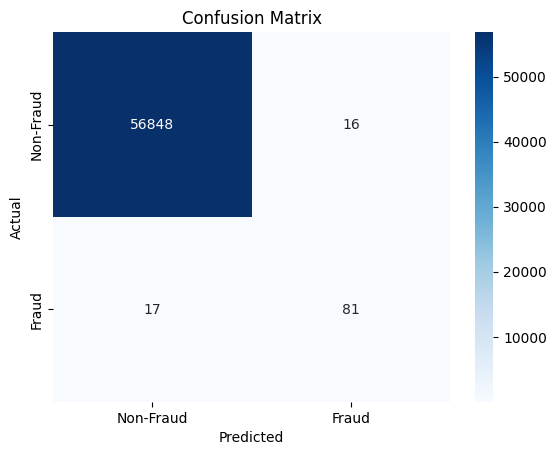

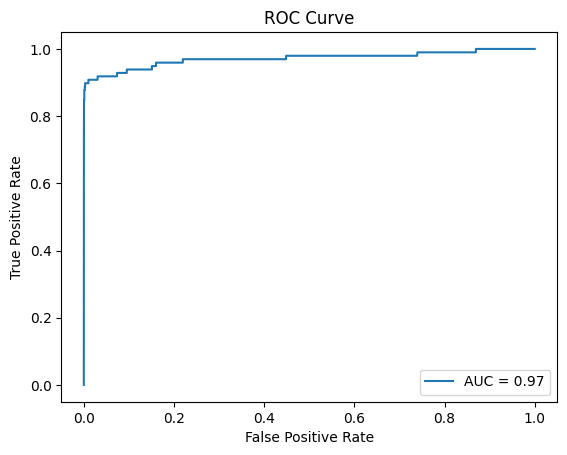

In [ ]:
# Predictions on the Test Set
y_test_pred_rf = rf.predict(X_test)
y_test_proba_rf = rf.predict_proba(X_test)[:, 1]

# Test Set Classification Report
print("Random Forest Test Set Classification Report:\n", classification_report(y_test, y_test_pred_rf))

# Test Set ROC-AUC Score
roc_auc_test_rf = roc_auc_score(y_test, y_test_proba_rf)
print("Random Forest Test Set ROC-AUC Score:", roc_auc_test_rf)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba_rf)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_test_rf:.2f}")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
